In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/student.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [10]:
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end="")
print(df['parental level of education'].unique())  

print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end="")
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [11]:
# Create columns transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]

)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (800, 19)
X_test shape: (200, 19)


In [17]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the model using RMSE, MAE, and R2 score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rmse, mse, mae, r2

In [21]:
# Dictionary of regression models
models = {
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "XGBoost Regressor": XGBRegressor(),
}

# Lists to track results
model_list = []
r2_list = []

# Loop through models and evaluate
for name, model in models.items():
    # Call the evaluation function (which trains the model internally)
    rmse, mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Print results
    print(f"Model: {name}")
    print("Model Performance on Test Data")
    print("  Root Mean Squared Error: {:.4f}".format(rmse))
    print("  Mean Squared Error: {:.4f}".format(mse))
    print("  Mean Absolute Error: {:.4f}".format(mae))
    print("  R2 Score: {:.4f}".format(r2))
    print("-----------------------------------\n")

    # Store results
    model_list.append(name)
    r2_list.append(r2)

# Identify the best model based on R2
best_index = r2_list.index(max(r2_list))
print("✅ Best model based on R2 score on test data: {}".format(model_list[best_index]))


Model: K Neighbors Regressor
Model Performance on Test Data
  Root Mean Squared Error: 7.2530
  Mean Squared Error: 52.6066
  Mean Absolute Error: 5.6210
  R2 Score: 0.7838
-----------------------------------

Model: Decision Tree
Model Performance on Test Data
  Root Mean Squared Error: 8.1102
  Mean Squared Error: 65.7750
  Mean Absolute Error: 6.4050
  R2 Score: 0.7297
-----------------------------------

Model: Random Forest
Model Performance on Test Data
  Root Mean Squared Error: 6.0875
  Mean Squared Error: 37.0574
  Mean Absolute Error: 4.7149
  R2 Score: 0.8477
-----------------------------------

Model: AdaBoost Regressor
Model Performance on Test Data
  Root Mean Squared Error: 6.0521
  Mean Squared Error: 36.6285
  Mean Absolute Error: 4.7288
  R2 Score: 0.8495
-----------------------------------

Model: Support Vector Regressor
Model Performance on Test Data
  Root Mean Squared Error: 8.1266
  Mean Squared Error: 66.0420
  Mean Absolute Error: 5.4015
  R2 Score: 0.7286
---

# Linear Regression

In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
r2_score(y_test, y_pred)
print("R2 score: ", r2_score(y_test, y_pred)*100)

R2 score:  87.90464771743794


Text(0.5, 1.0, 'Actual vs Predicted Values')

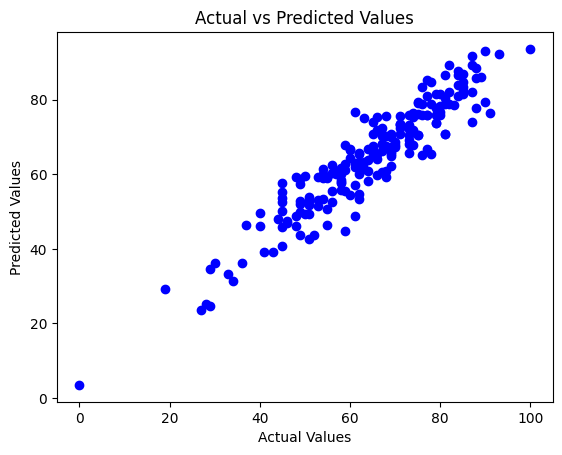

In [24]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")


In [25]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
